In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [60]:
data=pd.read_csv("../data/kaggle-IndianStartup/startup_funding.csv")

In [61]:
data.shape

(3044, 10)

In [62]:
data.head(3)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN


In [63]:
# data.isnull().sum()
print(data.count()/data.isna().count()*100)

Sr No                100.000000
Date dd/mm/yyyy      100.000000
Startup Name         100.000000
Industry Vertical     94.382392
SubVertical           69.250986
City  Location        94.086728
Investors Name        99.211564
InvestmentnType       99.868594
Amount in USD         68.462549
Remarks               13.764783
dtype: float64


In [64]:
# As Data present in Remarks is 13.764783% so we will drop it
data.drop("Remarks", axis=1, inplace=True)

## Who are the important investors in the Indian Ecosystem and Their Investment Type?

### Top 10 Investment types

In [65]:
data['InvestmentnType'] = data['InvestmentnType'].replace(['Seed/ Angel Funding',
                                                       'Seed / Angel Funding',
                                                       'Seed/Angel Funding',
                                                       'Angel / Seed Funding',
                                                       'Seed Funding'],'Seed / Angel Funding')

In [67]:
data["Amount in USD"] = data["Amount in USD"].apply(lambda x: str(x).replace(",",""))
data["Amount in USD"] = pd.to_numeric(data["Amount in USD"],errors='coerce')

In [69]:
data.columns=['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD']

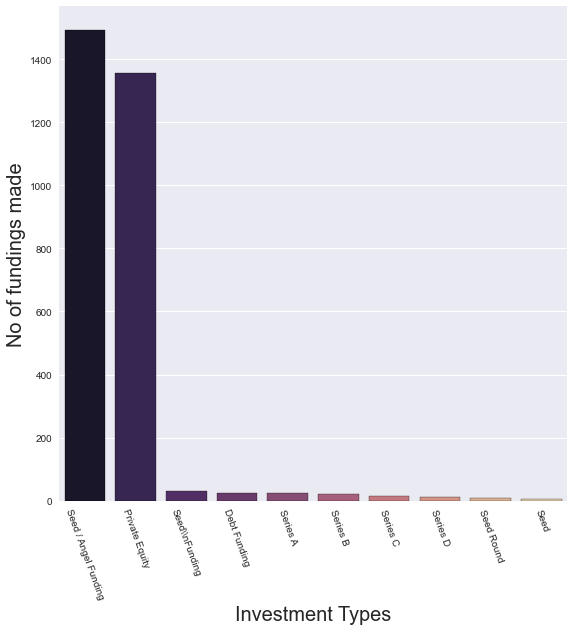

In [70]:
plt.style.use("seaborn")
Investment=data.InvestmentType.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(221)
fund= sns.barplot(x=Investment.index[:10],y=Investment.values[:10], palette="magma",edgecolor='black',saturation=0.50)
# sns.barplot()
fund.set_xticklabels(fund.get_xticklabels(),rotation=-70,fontsize=10)
fund.set_xlabel("Investment Types", fontsize=20,)
fund.set_ylabel("No of fundings made", fontsize=20)
plt.show()

### Top 5 Invester's (on basis of Max amount funded & frequency count)

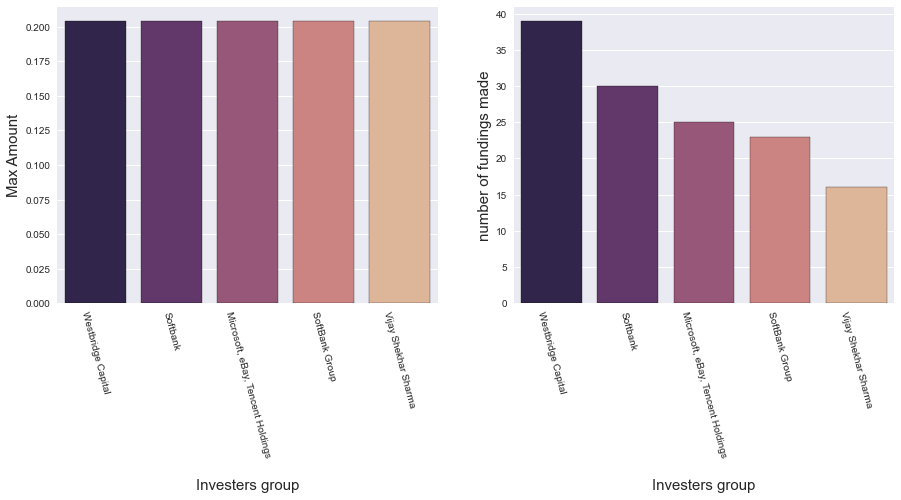

In [122]:
maxfundingsdf=data.sort_values(by='AmountInUSD',ascending=False,na_position='last')
top_fundings=maxfundingsdf['AmountInUSD'].head(5)
invester_names= maxfundingsdf['InvestorsName'].head(5)
plt.figure(figsize=(15,12))
plt.subplot(221)
g = sns.barplot(x=invester_names,y=top_fundings,palette="magma",edgecolor='black',saturation=0.50)
g.set_xticklabels(g.get_xticklabels(),rotation=-75)
g.set_xlabel("\nInvesters group", fontsize=15)
g.set_ylabel("Max Amount", fontsize=15)
valuecount_investers=data['InvestorsName'].value_counts()
plt.subplot(222)
g1 = sns.barplot(x=valuecount_investers.index[:5], y=valuecount_investers.values[:5],palette="magma",edgecolor='black',saturation=0.50) 
g1.set_xticklabels(g.get_xticklabels(),rotation=-75)
g1.set_xlabel("\nInvesters group", fontsize=15)
g1.set_ylabel("number of fundings made", fontsize=15)

plt.show()

### Pie-chart for top 5 different types of Funding

In [71]:

colrs = [ 'darkorange','turquoise', 'gold','lightgreen']

fig=go.Figure(data=[go.Pie(labels=Investment.index[:5],values=Investment.values[:5])])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=10,
                  marker=dict(colors=colrs))
fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "black"                
fig.update_layout(height=800,autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.show()

### Principal Investors of Startups 

Description count of Investors
Undisclosed Investors       39
Undisclosed investors       30
Ratan Tata                  25
Indian Angel Network        23
Kalaari Capital             16
Sequoia Capital             15
Group of Angel Investors    15
Undisclosed Investor        12
Accel Partners              12
undisclosed investors       11
Undisclosed                 11
Brand Capital               11
Venture Catalysts           11
SAIF Partners               10
RoundGlass Partners         10
Name: InvestorsName, dtype: int64


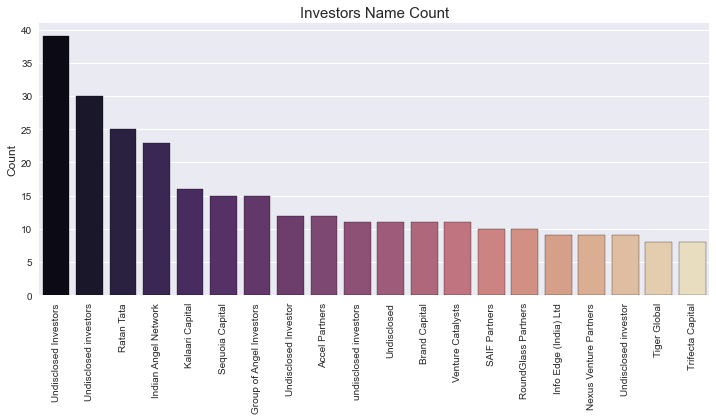

In [204]:
Investors = data.InvestorsName.value_counts()

print("Description count of Investors")
print(Investors[:15])

plt.figure(figsize = (12,5))
g = sns.barplot(x=Investors.index[:20],y=Investors.values[:20],palette="magma",edgecolor='black',saturation=0.50)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Investors Name Count", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.show()

### WordCloud of Investors Names

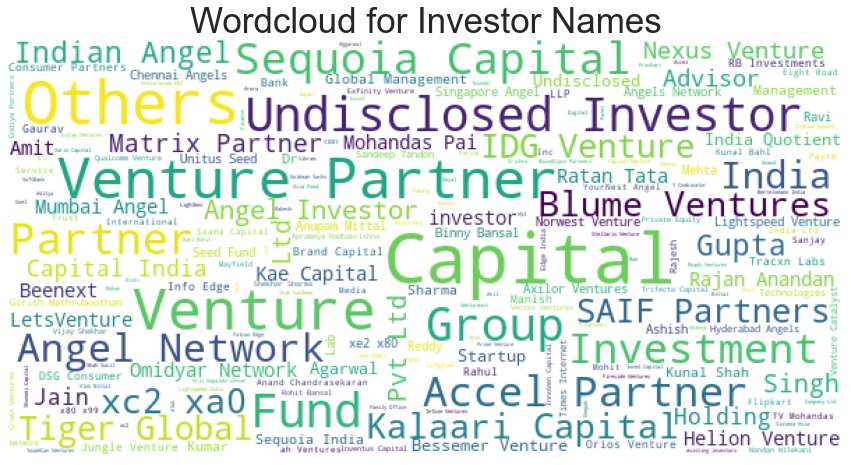

In [174]:
names = data["InvestorsName"][~pd.isnull(data["InvestorsName"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'white').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

### WordCloud of Technology Investors

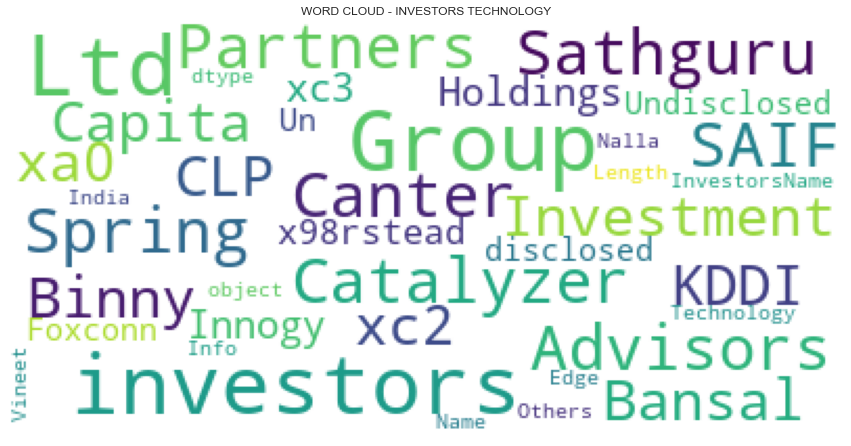

In [191]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data[data['IndustryVertical'] == 'Technology']['InvestorsName']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - INVESTORS TECHNOLOGY")
plt.axis('off')
plt.show()

## How much funds does startups generally get in India?

### Amount in USD distribuition

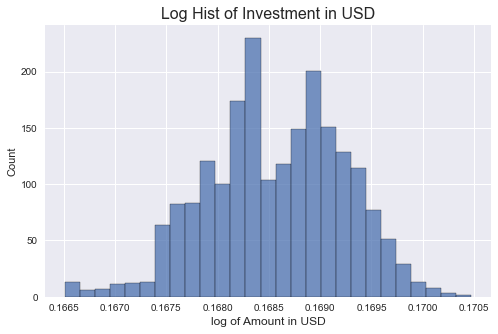

In [136]:
data['AmountInUSD'] = np.log(data["AmountInUSD"] + 1)

plt.figure(figsize=(8,5))
sns.histplot(data['AmountInUSD'].dropna())
plt.xlabel('log of Amount in USD', fontsize=12)
plt.title("Log Hist of Investment in USD", fontsize=16)
plt.show()
plt.hist()

Total startups funded :  2459
Ola Cabs         8
Swiggy           8
Paytm            7
Meesho           6
Medinfi          6
Nykaa            6
UrbanClap        6
NoBroker         6
Flipkart         5
Capital Float    5
Name: StartupName, dtype: int64


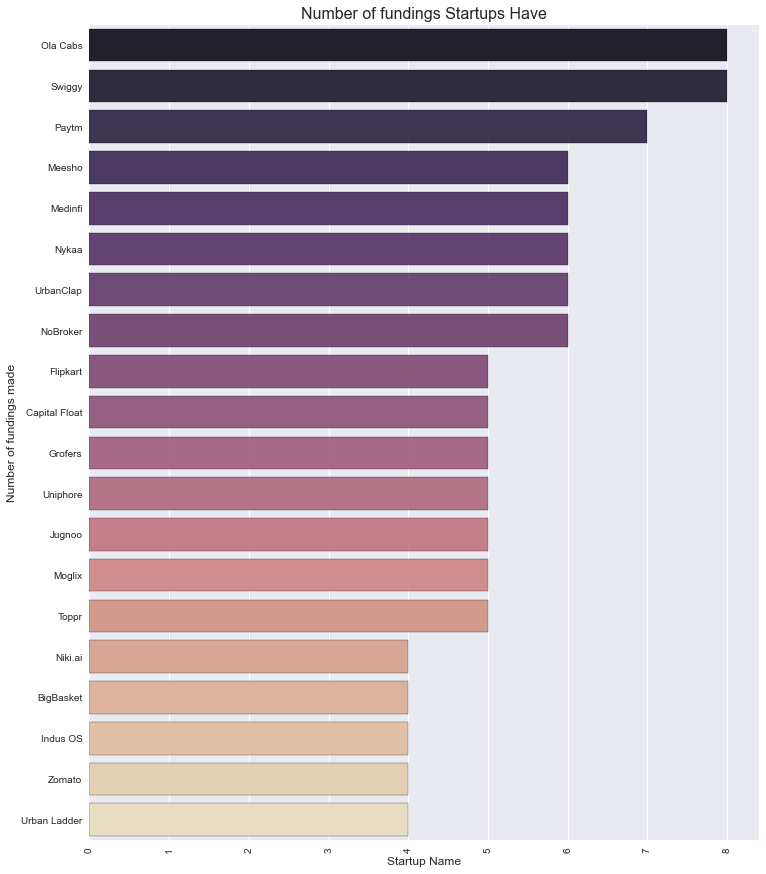

In [178]:
print("Total startups funded : ", len(data["StartupName"].unique()))
print(data["StartupName"].value_counts().head(10))
startupname = data['StartupName'].value_counts().head(20)

# lets plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9,palette="magma",edgecolor='black',saturation=0.50)
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

## Which industries are favored by investors for funding?

### Top 15 industry type

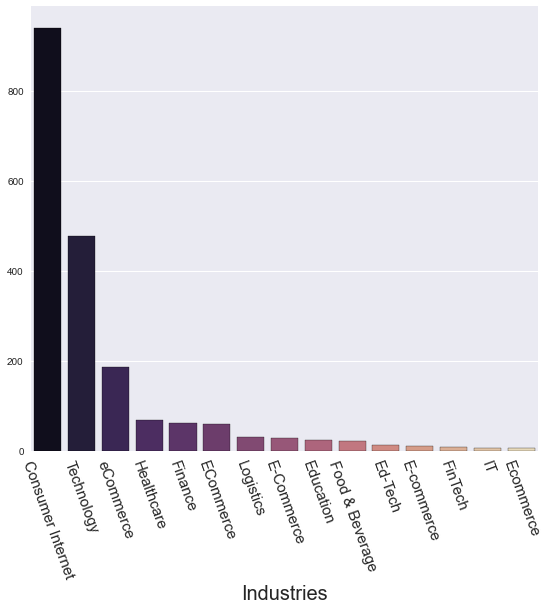

In [133]:
label10=np.arange(0,15)
top=data["IndustryVertical"].value_counts().head(15)
plt.figure(figsize=(20,18))
plt.subplot(221)
g = sns.barplot(x=top.index[:15],y=top.values[:15],palette="magma",edgecolor='black',saturation=0.50)
g.set_xticklabels(g.get_xticklabels(),rotation=-70, fontsize=15)
g.set_xlabel("Industries", fontsize=20)
plt.show()

### WordCloud for Industry Types

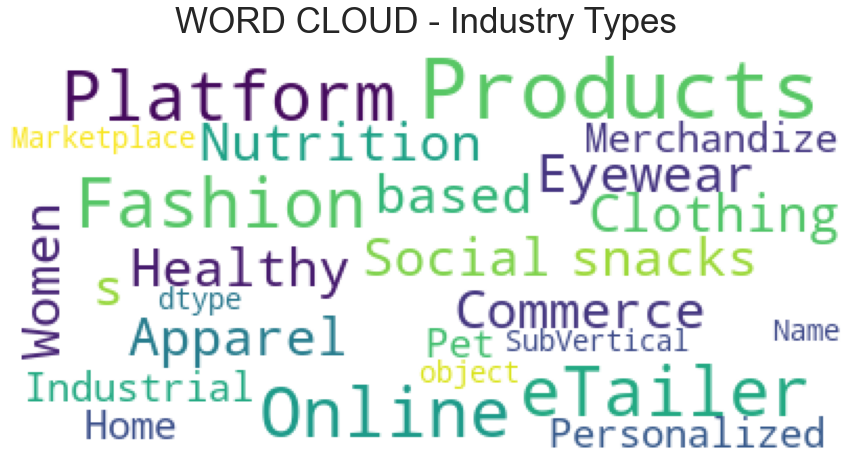

In [172]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=50,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data[data['IndustryVertical'] == 'Ecommerce']['SubVertical']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Industry Types", fontsize=35)
plt.axis('off')
plt.show()

### Consumer Internet Suvertical

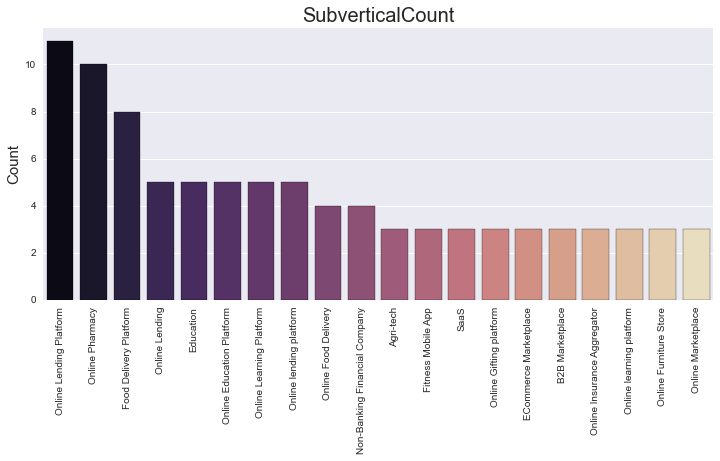

In [203]:
cons_sub = data['SubVertical'].value_counts()

plt.figure(figsize = (12,5))
g = sns.barplot(x=cons_sub.index[:20],y=cons_sub.values[:20],palette="magma",edgecolor='black',saturation=0.50)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("SubverticalCount", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Count", fontsize=15)
plt.show()

### Technology Subvertical

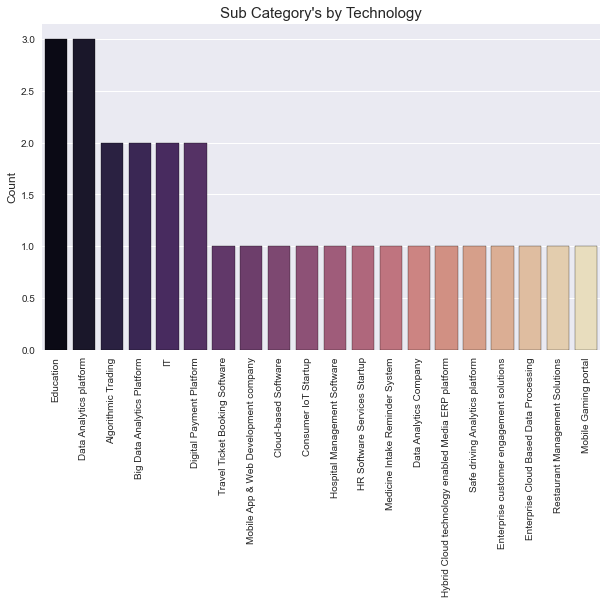

In [202]:
tech_sub = data[data['IndustryVertical'] == 'Technology']['SubVertical'].value_counts()

plt.figure(figsize = (10,6))
g = sns.barplot(x=tech_sub.index[:20],y=tech_sub.values[:20],palette="magma",edgecolor='black',saturation=0.50)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Sub Category's by Technology", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.show()


### Ecommerce Subvertical

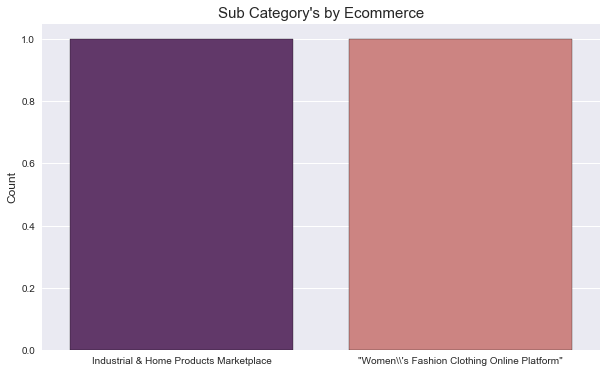

In [206]:
tech_sub = data[data['IndustryVertical'] == 'Ecommerce']['SubVertical'].value_counts()

plt.figure(figsize = (10,6))
g = sns.barplot(x=tech_sub.index[:2],y=tech_sub.values[:2],palette="magma",edgecolor='black',saturation=0.50)
g.set_xticklabels(g.get_xticklabels(),rotation=0)
g.set_title("Sub Category's by Ecommerce", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.show()

### WordCloud for SubVertical Industry Types

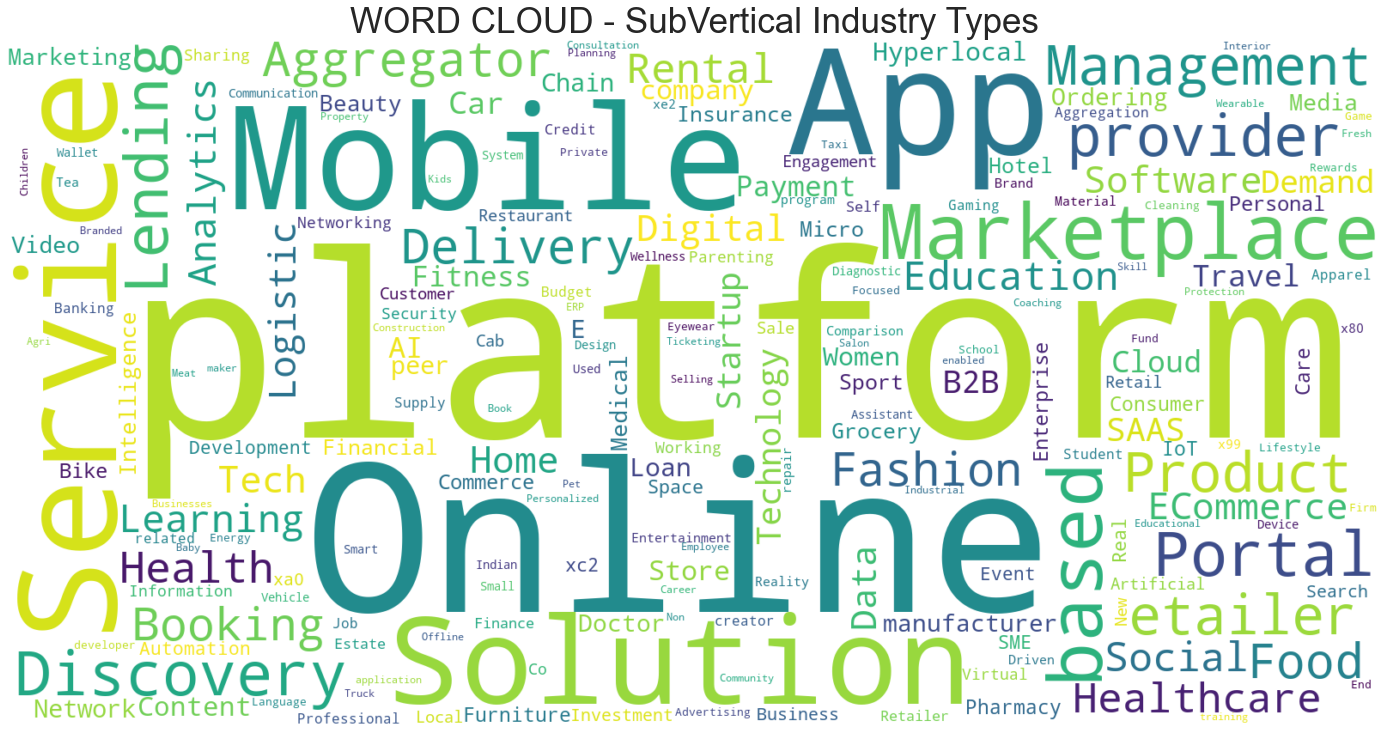

In [194]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text=[]
for i in range (0, len(data["SubVertical"])):
  if type(data["SubVertical"][i])==str:
    text.append(data["SubVertical"][i])
   
text=" ".join(text) 
text = text.split(" ")
# text=set(text)
text=" ".join(text) 
wordcloud = WordCloud( max_words=200, background_color="white",collocations=False, width=1600, height=800).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WORD CLOUD - SubVertical Industry Types", fontsize=35)

plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### WordCloud of startup names

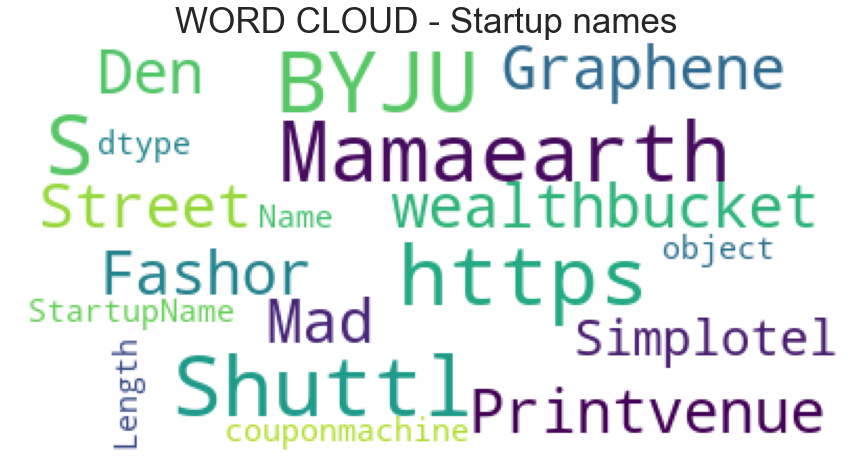

In [171]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['StartupName']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Startup names", fontsize=35)

plt.axis('off')
plt.show()

## Do Location play a major role in funding?

### Top 20 Cities for Startup's Funding 

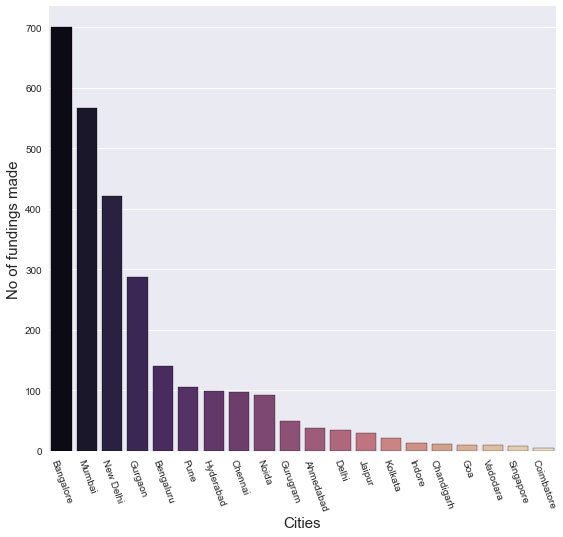

In [130]:
city=data['CityLocation'].value_counts()
plt.figure(figsize=(20,18))
plt.subplot(221)
g = sns.barplot(x=city.index[:20],y=city.values[:20],palette="magma",edgecolor='black',saturation=0.50)
g.set_xticklabels(g.get_xticklabels(),rotation=-70, fontsize=10)
g.set_xlabel("Cities", fontsize=15)
g.set_ylabel("No of fundings made", fontsize=15)
plt.show()

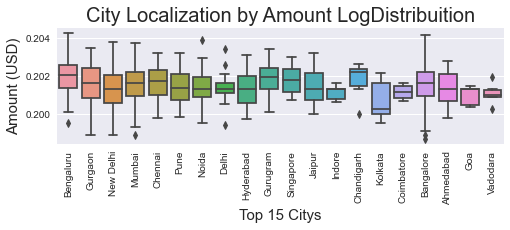

In [134]:
plt.subplot(212)
g = sns.boxplot(x='CityLocation', y="AmountInUSD",
                data=data[data.CityLocation.isin(city[:20].index.values)])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("City Localization by Amount LogDistribuition", fontsize=20)
g.set_xlabel("Top 15 Citys", fontsize=15)
g.set_ylabel("Amount (USD)", fontsize=15)

plt.subplots_adjust(hspace = 0.65,top = 0.9)

plt.show()

## How does the funding ecosystem change with time?

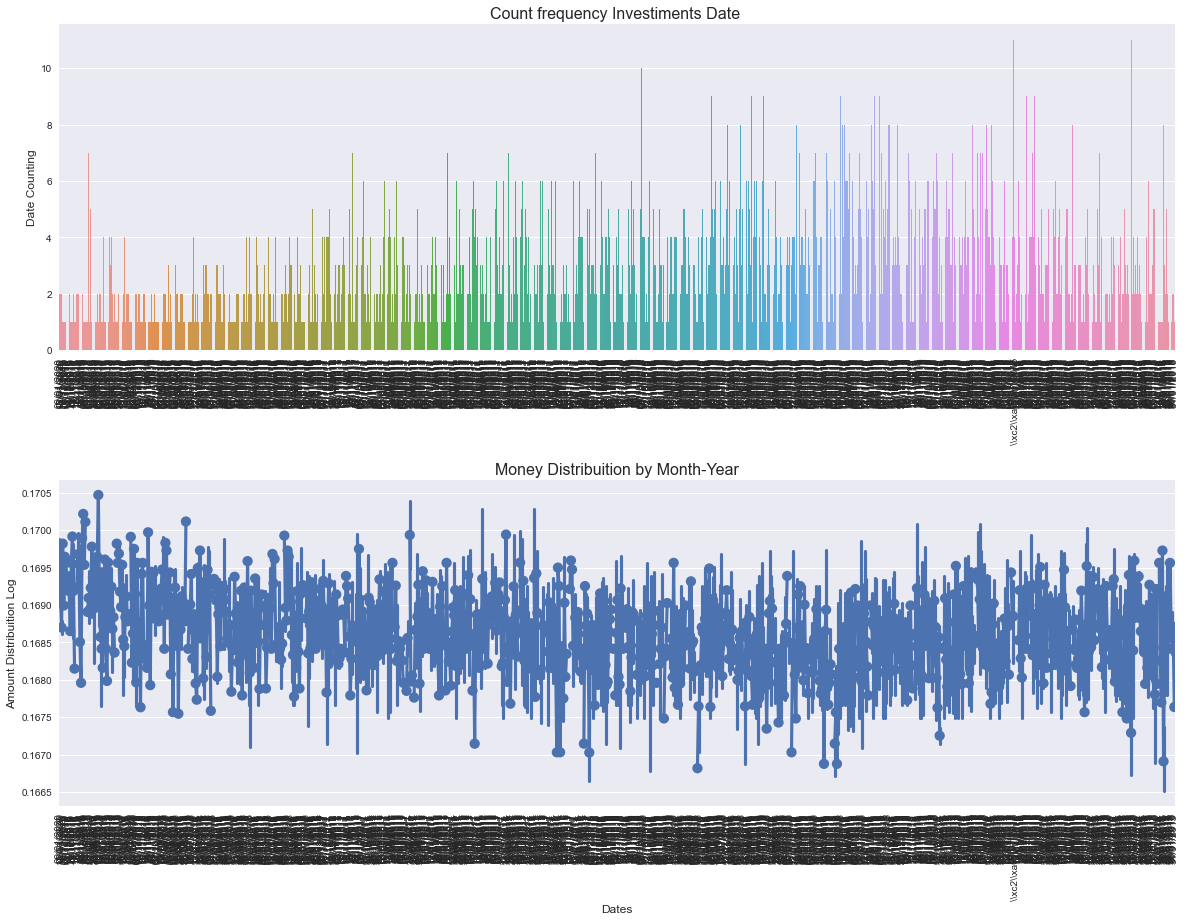

In [195]:
plt.figure(figsize=(20,14))
plt.subplot(211)
sns.countplot(x='Date', data=data)
plt.xticks(rotation=90)
plt.xlabel('', fontsize=12)
plt.ylabel('Date Counting', fontsize=12)
plt.title("Count frequency Investiments Date ", fontsize=16)

plt.subplot(212)
sns.pointplot(x='Date', y='AmountInUSD', data=data)
plt.xticks(rotation=90)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Amount Distribuition Log', fontsize=12)
plt.title("Money Distribuition by Month-Year", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()